Import all the neccessary libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a pandas DataFrame.

In [108]:
df1=pd.read_csv('hr_employee_churn_data.csv')

Check the dataframe and its data

In [109]:
df1.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


Checking the dimensions of the DataFrame

In [110]:
df1.shape

(14999, 10)

View the DataFrame's structure, data types, and null value information.

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


##Feature Engineering

Create a copy of the DataFrame for manipulation without affecting the original.

In [112]:
df2=df1.copy()

Remove the 'empid' column from the DataFrame

In [113]:
df2.drop(['empid'],axis=1,inplace=True)

In [114]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


 Check for missing values in the DataFrame

In [115]:
df2.isnull().sum()

,0
satisfaction_level,2
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
left,0


In [116]:
df2['satisfaction_level'].describe()

,satisfaction_level
count,14997.000000
mean,0.612863
std,0.248634
min,0.090000
25%,0.440000
50%,0.640000
75%,0.820000
max,1.000000


Filling missing values in 'satisfaction_level' with the column's mean.

In [117]:
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(), inplace=True)

<ipython-input-117-633901b4c988>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(), inplace=True)


Checking for any remaining missing values in the DataFrame.

In [118]:
df2.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
left,0


View the unique values in the 'salary' column.

In [119]:
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [120]:
salary_dummies = pd.get_dummies(df2['salary'],drop_first=True)

In [121]:
salary_dummies

,low,medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [122]:
df2=pd.concat([df2,salary_dummies],axis=1)

In [123]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,True,False
1,0.80,0.86,5,262,6,0,0,medium,1,False,True
2,0.11,0.88,7,272,4,0,0,medium,1,False,True
3,0.72,0.87,5,223,5,0,0,low,1,True,False
4,0.37,0.52,2,159,3,0,0,low,1,True,False


Dropping the salary feature

In [124]:
df2.drop(['salary'],axis=1,inplace=True)

In [125]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,True,False
1,0.80,0.86,5,262,6,0,0,1,False,True
2,0.11,0.88,7,272,4,0,0,1,False,True
3,0.72,0.87,5,223,5,0,0,1,True,False
4,0.37,0.52,2,159,3,0,0,1,True,False


Splitting the dataset into features and labels

In [126]:
X= df2.drop(labels='left',axis=1)
y= df2['left']

Splitting dataset into train and test set

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [128]:
len(X_train)

11999

In [129]:
len(X_test)

3000

##Model Selection

In [130]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Hyperparameter Tuning for RF and XGB

In [131]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

Performing Grid Search for Hyperparameter Tuning

In [132]:
print(X.shape)  # Should output something like (n_samples, n_features)
print(y.shape)  # Should output something like (n_samples,)


(14999, 9)
(14999,)


In [133]:
# Check for NaN values in X
print(X.isnull().sum())

# Check for NaN values in y
print(pd.isnull(y).sum())


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
low                      0
medium                   0
dtype: int64
0


In [134]:
# Check data types of the columns in X
print(X.dtypes)

# Check data type of y
print(y.dtypes)


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
low                         bool
medium                      bool
dtype: object
int64


In [135]:
scores = []

# Loop through each model in the model_param dictionary
for model_name, mp in model_param.items():
    try:
        # Initialize GridSearchCV with model and parameters
        model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5, return_train_score=False)

        # Fit the model
        model_selection.fit(X, y)

        # Append results to scores list
        scores.append({
            'model': model_name,
            'best_score': model_selection.best_score_,
            'best_params': model_selection.best_params_
        })

    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Output the scores (if successful)
print(scores)


Error with model XGBClassifier: 'super' object has no attribute '__sklearn_tags__'
[{'model': 'RandomForestClassifier', 'best_score': 0.9250640880293431, 'best_params': {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}}]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [136]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9250640880293431,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}}]

##Model Building

In [137]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)

In [138]:
model_xgb.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [139]:
model_xgb.score(X_test,y_test)

0.9916666666666667

In [140]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,False,True
13378,0.55,0.96,3,194,3,0,0,False,True
10233,0.72,0.67,5,210,2,0,0,False,True
4719,0.96,0.75,4,177,2,0,0,True,False
7003,0.96,0.54,3,198,3,0,0,True,False


In [141]:
X_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,False,True


In [142]:
model_xgb.predict(X_test[:1])

array([1])

In [143]:
df1.loc[1670]

,1670
empid,1671
satisfaction_level,0.44
last_evaluation,0.57
number_project,2
average_montly_hours,141
time_spend_company,3
Work_accident,0
promotion_last_5years,0
salary,medium
left,1


In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[2290,    9],
       [  16,  685]])

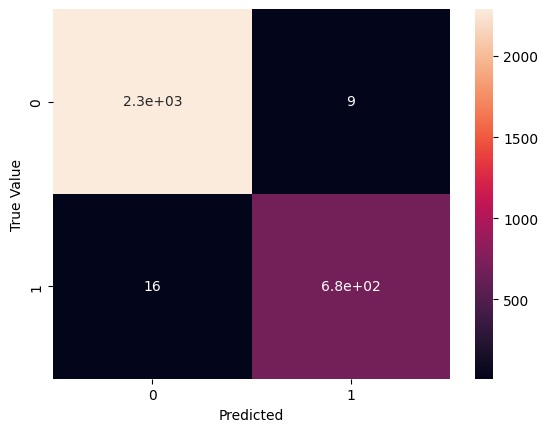

In [145]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()